In [64]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import scipy.spatial
import functools
import time

%matplotlib inline

# 8. Kernel Methods: Let’s Implement

### 8.1 Kernelization Review

### 8.2 Kernels and Kernel Machines

1.Write functions that compute the RBF kernel $k_{\text{RBF}(\sigma)}(x,x')=\exp\left(-\|x-x'\|^{2}/\left(2\sigma^{2}\right)\right)$
and the polynomial kernel $k_{\text{poly}(a,d)}(x,x')=\left(a+\left\langle x,x'\right\rangle \right)^{d}$.
The linear kernel $k_{\text{linear}}(x,x')=\left\langle x,x'\right\rangle $,
has been done for you in the support code. Your functions should take
as input two matrices $W\in \mathbf R^{n_{1}\times d}$ and $X\in \mathbf R^{n_{2}\times d}$
and should return a matrix $M\in \mathbf R^{n_{1}\times n_{2}}$ where
$M_{ij}=k(W_{i\cdot},X_{j\cdot})$. In words, the $(i,j)$'th entry
of $M$ should be kernel evaluation between $w_{i}$ (the $i$th row
of $W$) and $x_{j}$ (the $j$th row of $X$). The matrix $M$ could
be called the ''cross-kernel'' matrix, by analogy to the cross-variance matrix}.
For the RBF kernel, you may use the scipy function \texttt{cdist(X1,X2,'sqeuclidean')}
in the package \texttt{scipy.spatial.distance} or (with some more
work) write it in terms the linear kernel (Bauckhage's article
on calculating Euclidean distance matrices may be helpful).

In [5]:
### Kernel function generators
def linear_kernel(W, X):
    """
    Computes the linear kernel between two sets of vectors.
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
    Returns:
        matrix of size n1xn2, with w_i^T x_j in position i,j
    """
    return np.dot(W,np.transpose(X))
 
def RBF_kernel(W,X,sigma=1):
    """
    Computes the RBF kernel between two sets of vectors   
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        sigma - the bandwidth (i.e. standard deviation) for the RBF/Gaussian kernel
    Returns:
        matrix of size n1xn2, with exp(-||w_i-x_j||^2/(2 sigma^2)) in position i,j
    """
    #TODO
    res = scipy.spatial.distance.cdist(W,X,'sqeuclidean')
    return scipy.exp(-res / sigma**2)
    
def polynomial_kernel(W, X, offset=1, degree=3):
    """
    Computes the inhomogeneous polynomial kernel between two sets of vectors
    Args:
        W, X - two matrices of dimensions n1xd and n2xd
        offset, degree - two parameters for the kernel
    Returns:
        matrix of size n1xn2, with (offset + <w_i,x_j>)^degree in position i,j
    """
    #TODO
    res = np.dot(W,np.transpose(X))
    res = offset + res
    res = res**degree
    return res
    


2.Use the linear kernel function defined in the code to compute the
kernel matrix on the set of points $x_{0}\in\mathcal D_{X}=\left\{ -4,-1,0,2\right\} $.
Include both the code and the output.

In [6]:
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
print(prototypes)

[[-4]
 [-1]
 [ 0]
 [ 2]]


In [7]:
print("Linear kernel")
print(linear_kernel(prototypes, prototypes))

Linear kernel
[[16  4  0 -8]
 [ 4  1  0 -2]
 [ 0  0  0  0]
 [-8 -2  0  4]]


In [8]:
print("RBF kernel")
print(RBF_kernel(prototypes, prototypes, 1))

RBF kernel
[[  1.00000000e+00   1.23409804e-04   1.12535175e-07   2.31952283e-16]
 [  1.23409804e-04   1.00000000e+00   3.67879441e-01   1.23409804e-04]
 [  1.12535175e-07   3.67879441e-01   1.00000000e+00   1.83156389e-02]
 [  2.31952283e-16   1.23409804e-04   1.83156389e-02   1.00000000e+00]]


In [9]:
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)
print("Polynomial kernel")
print(polynomial_kernel(prototypes, prototypes, 1, 3))

Polynomial kernel
[[4913  125    1 -343]
 [ 125    8    1   -1]
 [   1    1    1    1]
 [-343   -1    1  125]]


3.Suppose we have the data set $\mathcal D=\left\{ (-4,2),(-1,0),(0,3),(2,5)\right\} $.
Then by the representer theorem, the final prediction function will
be in the span of the functions $x\mapsto k(x_{0},x)$ for $x_{0}\in\mathcal D_{X}=\left\{ -4,-1,0,2\right\} $. Then by the representer theorem, the final prediction function will
be in the span of the functions $x\mapsto k(x_{0},x)$ for $x_{0}\in\mathcal D_{X}=\left\{ -4,-1,0,2\right\} $.
This set of functions will look quite different depending on the kernel
function we use.

a) Plot the set of functions $x\mapsto k_{\text{linear}}(x_{0},x)$ for
$x_{0}\in\mathcal D_{X}$ and for $x\in[-6,6]$.

b) Plot the set of functions $x\mapsto k_{\text{poly(1,3)}}(x_{0},x)$
for $x_{0}\in\mathcal D_{X}$ and for $x\in[-6,6]$.

c) Plot the set of functions $x\mapsto k_{\text{RBF(1)}}(x_{0},x)$ for
$x_{0}\in\mathcal D_{X}$ and for $x\in[-6,6]$.

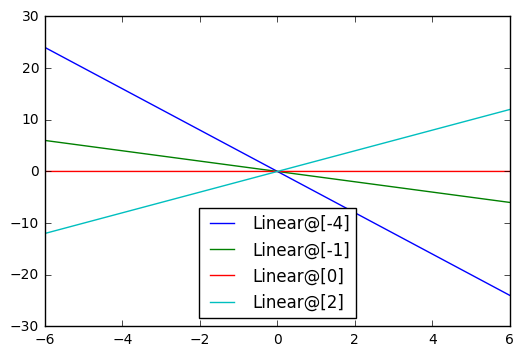

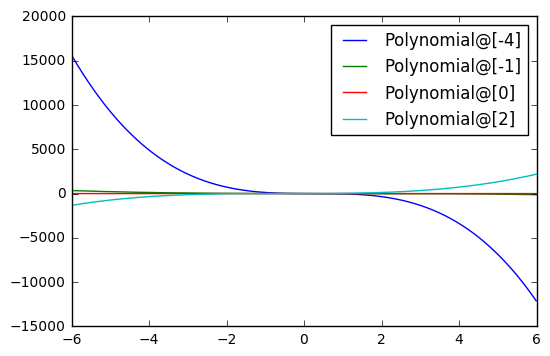

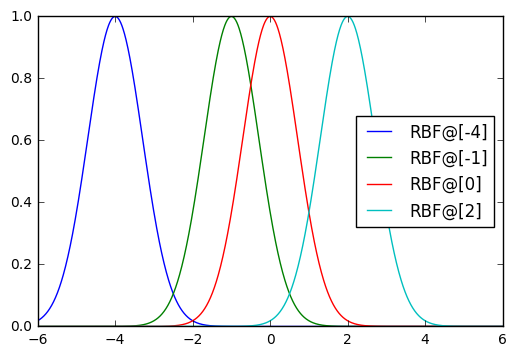

In [10]:
# Plot kernel machine functions

plot_step = .01
xpts = np.arange(-6.0, 6, plot_step).reshape(-1,1)
prototypes = np.array([-4,-1,0,2]).reshape(-1,1)

# Linear kernel
y = linear_kernel(prototypes, xpts) 
for i in range(len(prototypes)):
    label = "Linear@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

# Polynomial kernel
y = polynomial_kernel(prototypes, xpts, 1, 3) 
for i in range(len(prototypes)):
    label = "Polynomial@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

# RBF kernel
y = RBF_kernel(prototypes, xpts, 1) 
for i in range(len(prototypes)):
    label = "RBF@"+str(prototypes[i,:])
    plt.plot(xpts, y[i,:], label=label)
plt.legend(loc = 'best')
plt.show() 

4.By the representer theorem, the final prediction function will be
of the form $f(x)=\sum_{i=1}^{n}\alpha_{i}k(x_{i},x)$, where $x_{1},\ldots,x_{n}\in\cx$
are the inputs in the training set. This is a special case of what
is sometimes called a \textbf{\href{https://davidrosenberg.github.io/ml2015/docs/4c.kernels.pdf\#page=16}{kernel machine}},
which is a function of the form $f(x)=\sum_{i=1}^{r}\alpha_{i}k(\mu_{i},x)$,
where $\mu_{1},\ldots,\mu_{r}\in\cx$ are called \textbf{prototypes}
or \textbf{centroids} (Murphy's book Section 14.3.1.). In the special
case that the kernel is an RBF kernel, we get what's called an \textbf{RBF
Network} (proposed by \href{http://sci2s.ugr.es/keel/pdf/algorithm/articulo/1988-Broomhead-CS.pdf}{Broomhead and Lowe in 1988}).
We can see that the prediction functions we get from our kernel methods
will be kernel machines in which every input point $x_{1},\ldots,x_{n}$
serves as a prototype point. Complete the \texttt{predict} function
of the class \texttt{Kernel\_Machine} in the skeleton code. Construct
a \texttt{Kernel\_Machine} object with the RBF kernel (sigma=1), with
prototype points at $-1,0,1$ and corresponding weights $1,-1,1$.
Plot the resulting function.

In [11]:
class Kernel_Machine(object):
    def __init__(self, kernel, prototype_points, weights):
        """
        Args:
            kernel(W,X) - a function return the cross-kernel matrix between rows of W and rows of X for kernel k
            prototype_points - an Rxd matrix with rows mu_1,...,mu_R
            weights - a vector of length R
        """

        self.kernel = kernel
        self.prototype_points = prototype_points
        self.weights = weights
        
    def predict(self, X):
        """
        Evaluates the kernel machine on the points given by the rows of X
        Args:
            X - an nxd matrix with inputs x_1,...,x_n in the rows
        Returns:
            Vector of kernel machine evaluations on the n points in X.  Specifically, jth entry of return vector is
                Sum_{i=1}^R w_i k(x_j, mu_i)
        """
        # TODO
        K = self.kernel(self.prototype_points, X)
        res = np.dot(np.transpose(self.weights), K)
        res = res.reshape(-1,1)
        return res


In [12]:
prototypes = np.array([-1,0,1]).reshape(-1,1)
weights = np.array([1,-1,1]).reshape(-1,1)

In [13]:
km = Kernel_Machine(RBF_kernel, prototypes, weights)

In [14]:
xpts = np.arange(-5.0, 6, plot_step).reshape(-1,1)
preds = km.predict(xpts)

In [15]:
preds = preds.reshape(-1,1)

/Users/lakshay/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


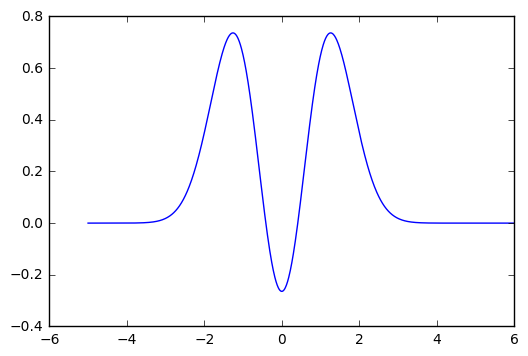

In [16]:
plt.plot(xpts, preds)
plt.legend(loc = 'best')
plt.show() 

### 8.3 Kernel Ridge Regression

In the zip file for this assignment, you'll find a training and test
set, along with some skeleton code. We're considering a one-dimensional
regression problem, in which $\mathcal X=\mathcal Y=\mathcal A=\mathbf R$. We'll fit this
data using kernelized ridge regression, and we'll compare the results
using several different kernel functions. Because the input space
is one-dimensional, we can easily visualize the results.

1.Plot the training data. You should note that while there is a clear
relationship between $x$ and $y$, the relationship is not linear.

In [17]:
data_train,data_test = np.loadtxt("krr-train.txt"),np.loadtxt("krr-test.txt")
x_train, y_train = data_train[:,0].reshape(-1,1),data_train[:,1].reshape(-1,1)
x_test, y_test = data_test[:,0].reshape(-1,1),data_test[:,1].reshape(-1,1)

/Users/lakshay/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


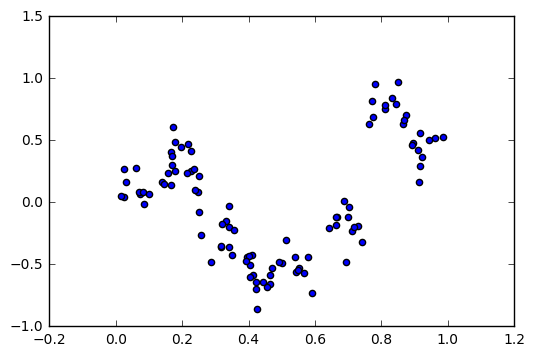

In [18]:
plt.scatter(x_train, y_train)
plt.legend(loc = 'best')
plt.show() 

2.In a previous problem, we showed that in kernelized ridge regression,
the final prediction function is $f(x)=\sum_{i=1}^{n}\alpha_{i}k(x_{i},x)$,
where $\alpha=(\lambda I+K)^{-1}y$ and $K\in \mathbf R^{n\times n}$
is the Gram matrix of the training data: $K_{ij}=k(x_{i},x_{j})$,
for $x_{1},\ldots,x_{n}$. In terms of kernel machines, $\alpha_{i}$
is the weight on the kernel function evaluated at the prototype point
$x_{i}$. Complete the function $\texttt{train kernel_ridge_regression}$
so that it performs kernel ridge regression and returns a $\texttt{Kernel_Machine}$
object that can be used for predicting on new points.

In [19]:
def train_kernel_ridge_regression(X, y, kernel, l2reg):
    # TODO0
    K = kernel(X, X)
    n = X.size
    a = l2reg * np.identity(n) + K
    b = y
    alpha = np.linalg.solve(a, b)
    return Kernel_Machine(kernel, X, alpha)

In [20]:
train_kernel_ridge_regression(x_train, y_train, RBF_kernel, 0.5)

3.Use the code provided to plot your fits to the training data for the
RBF kernel with a fixed regularization parameter of $0.0001$ for
3 different values of sigma: $0.01$, $0.1$, and $1.0$. With values
of sigma do you think would be more likely to over fit, and which
less?

> <b>Solution:</b>

> Higher values of $\sigma$ are less likely to overfit, and smaller values of $\sigma$ are more likely to overfit.

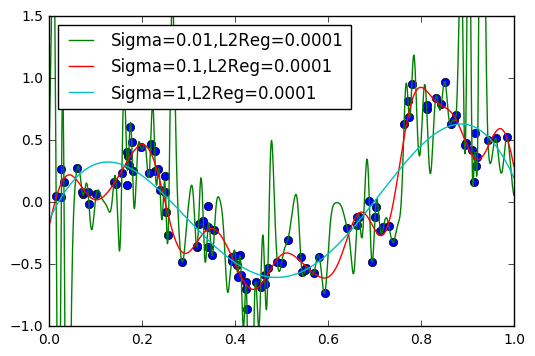

In [21]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
l2reg = 0.0001
for sigma in [.01,.1,1]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

4.Use the code provided to plot your fits to the training data for the
RBF kernel with a fixed sigma of $0.02$ and 4 different values of
the regularization parameter $\lambda$: $0.0001$, $0.01$, $0.1$,
and $2.0$. What happens to the prediction function as $\lambda\to\infty$?

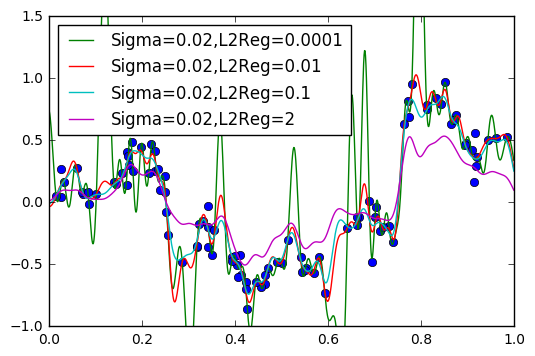

In [22]:
plot_step = .001
xpts = np.arange(0 , 1, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
sigma= .02
for l2reg in [.0001,.01,.1,2]:
    k = functools.partial(RBF_kernel, sigma=sigma)
    f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
    label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
    plt.plot(xpts, f.predict(xpts), label=label)
plt.legend(loc = 'best')
plt.ylim(-1,1.5)
plt.show()

> As $\lambda \rightarrow \infty$, the curve becomes a flat line.

5.Find the best hyperparameter settings (including kernel parameters
and the regularization parameter) for each of the kernel types. Summarize
your results in a table, which gives training error and test error
for each setting. Include in your table the best settings for each
kernel type, as well as nearby settings that show that making small
change in any one of the hyperparameters in either direction will
cause the performance to get worse. You should use average square
loss on the test set to rank the parameter settings. To make things
easier for you, we have provided an sklearn wrapper for the kernel
ridge regression function we have created so that you can us sklearn's
GridSearchCV. Note: Because of the small dataset size, these models
can be fit extremely fast, so there is no excuse for not doing extensive
hyperparameter tuning.

In [23]:
from sklearn.base import BaseEstimator, RegressorMixin, ClassifierMixin

class KernelRidgeRegression(BaseEstimator, RegressorMixin):  
    """sklearn wrapper for our kernel ridge regression"""
     
    def __init__(self, kernel="RBF", sigma=1, degree=2, offset=1, l2reg=1):        
        self.kernel = kernel
        self.sigma = sigma
        self.degree = degree
        self.offset = offset
        self.l2reg = l2reg 

    def fit(self, X, y=None):
        """
        This should fit classifier. All the "work" should be done here.
        """
        if (self.kernel == "linear"):
            self.k = linear_kernel
        elif (self.kernel == "RBF"):
            self.k = functools.partial(RBF_kernel, sigma=self.sigma)
        elif (self.kernel == "polynomial"):
            self.k = functools.partial(polynomial_kernel, offset=self.offset, degree=self.degree)
        else:
            raise ValueError('Unrecognized kernel type requested.')
        
        self.kernel_machine_ = train_kernel_ridge_regression(X, y, self.k, self.l2reg)

        return self

    def predict(self, X, y=None):
        try:
            getattr(self, "kernel_machine_")
        except AttributeError:
            raise RuntimeError("You must train classifer before predicting data!")

        return(self.kernel_machine_.predict(X))

    def score(self, X, y=None):
        # get the average square error
        return((self.predict(X)-y).mean()) 

In [24]:
from sklearn.model_selection import GridSearchCV,PredefinedSplit
from sklearn.model_selection import ParameterGrid
from sklearn.metrics import mean_squared_error,make_scorer
import pandas as pd
    
test_fold = [-1]*len(x_train) + [0]*len(x_test)   #0 corresponds to test, -1 to train
predefined_split = PredefinedSplit(test_fold=test_fold)

In [25]:
print(x_train.size)
print(y_train.size)
print(x_test.size)
print(y_test.size)
print(len(test_fold))


100
100
50
50
150


In [26]:
type(predefined_split)

sklearn.model_selection._split.PredefinedSplit

In [27]:
predefined_split

PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0]))

In [28]:
param_grid = [{'kernel': ['RBF'],'sigma':[.1,1,10], 'l2reg': np.exp2(-np.arange(-5,5,1))},
              {'kernel':['polynomial'],'offset':[-1,0,1], 'degree':[2,3,4],'l2reg':[10, .1, .01] },
              {'kernel':['linear'],'l2reg': [10,1,.01]}]
kernel_ridge_regression_estimator = KernelRidgeRegression()
grid = GridSearchCV(kernel_ridge_regression_estimator, 
                    param_grid,
                    cv = predefined_split,
                    scoring = make_scorer(mean_squared_error,greater_is_better = False)
                  # n_jobs = -1  #should allow parallelism, but crashes Python on my machine
                   )
grid.fit(np.vstack((x_train,x_test)),np.vstack((y_train,y_test))) 

GridSearchCV(cv=PredefinedSplit(test_fold=array([-1, -1, ...,  0,  0])),
       error_score='raise',
       estimator=KernelRidgeRegression(degree=2, kernel='RBF', l2reg=1, offset=1, sigma=1),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'l2reg': array([ 32.    ,  16.    ,   8.    ,   4.    ,   2.    ,   1.    ,
         0.5   ,   0.25  ,   0.125 ,   0.0625]), 'kernel': ['RBF'], 'sigma': [0.1, 1, 10]}, {'l2reg': [10, 0.1, 0.01], 'kernel': ['polynomial'], 'offset': [-1, 0, 1], 'degree': [2, 3, 4]}, {'l2reg': [10, 1, 0.01], 'kernel': ['linear']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=make_scorer(mean_squared_error, greater_is_better=False),
       verbose=0)

In [29]:
pd.set_option('display.max_rows', 20)
df = pd.DataFrame(grid.cv_results_)
# Flip sign of score back, because GridSearchCV likes to maximize,
# so it flips the sign of the score if "greater_is_better=FALSE"
df['mean_test_score'] = -df['mean_test_score']
df['mean_train_score'] = -df['mean_train_score']
cols_to_keep = ["param_degree", "param_kernel","param_l2reg" ,"param_offset","param_sigma",
        "mean_test_score","mean_train_score"]
df_toshow = df[cols_to_keep].fillna('-')
df_toshow.sort_values(by=["param_kernel", "mean_test_score"])

,param_degree,param_kernel,param_l2reg,param_offset,param_sigma,mean_test_score,mean_train_score
27,-,RBF,0.0625,-,0.1,0.013866,0.014689
24,-,RBF,0.1250,-,0.1,0.014398,0.015934
21,-,RBF,0.2500,-,0.1,0.015807,0.017876
18,-,RBF,0.5000,-,0.1,0.018022,0.020495
15,-,RBF,1.0000,-,0.1,0.020777,0.023856
12,-,RBF,2.0000,-,0.1,0.024028,0.028609
9,-,RBF,4.0000,-,0.1,0.029206,0.036899
6,-,RBF,8.0000,-,0.1,0.040242,0.052832
28,-,RBF,0.0625,-,1,0.057994,0.088177
25,-,RBF,0.1250,-,1,0.058438,0.090736


In [30]:
def print_full(x):
    pd.set_option('display.max_rows', len(x))
    print(x)
    pd.reset_option('display.max_rows')

df_toshow = df_toshow.sort_values(by=["param_kernel", "mean_test_score"])
df_toshow = df_toshow.reset_index(drop=True)
print_full(df_toshow)

   param_degree param_kernel  param_l2reg param_offset param_sigma  \
0             -          RBF       0.0625            -         0.1   
1             -          RBF       0.1250            -         0.1   
2             -          RBF       0.2500            -         0.1   
3             -          RBF       0.5000            -         0.1   
4             -          RBF       1.0000            -         0.1   
5             -          RBF       2.0000            -         0.1   
6             -          RBF       4.0000            -         0.1   
7             -          RBF       8.0000            -         0.1   
8             -          RBF       0.0625            -           1   
9             -          RBF       0.1250            -           1   
10            -          RBF      16.0000            -         0.1   
11            -          RBF       0.2500            -           1   
12            -          RBF       0.5000            -           1   
13            -     

> Best RBF kernel hyper-parameters

In [31]:
df_toshow.loc[0]

param_degree                -
param_kernel              RBF
param_l2reg            0.0625
param_offset                -
param_sigma               0.1
mean_test_score     0.0138662
mean_train_score    0.0146886
Name: 0, dtype: object

> Best linear kernel hyper-parameters

In [32]:
df_toshow.loc[30]

param_degree               -
param_kernel          linear
param_l2reg                1
param_offset               -
param_sigma                -
mean_test_score      0.16454
mean_train_score    0.206506
Name: 30, dtype: object

> Best polynomial kernel hyper-parameters

In [33]:
df_toshow.loc[33]

param_degree                 4
param_kernel        polynomial
param_l2reg               0.01
param_offset                -1
param_sigma                  -
mean_test_score      0.0434543
mean_train_score      0.060135
Name: 33, dtype: object

6.Plot your best fitting prediction functions using the polynomial kernel
and the RBF kernel. Use the domain $x\in\left(-0.5,1.5\right)$. Comment
on the results. 

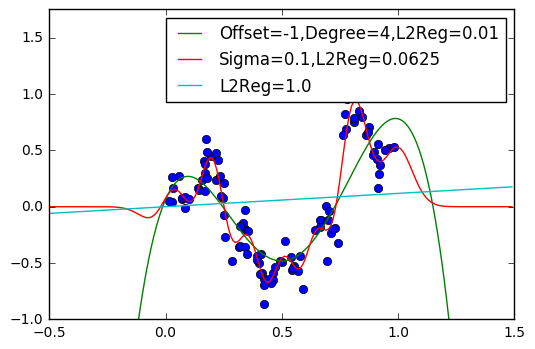

In [34]:
## Plot the best polynomial and RBF fits you found
plot_step = .01
xpts = np.arange(-.5 , 1.5, plot_step).reshape(-1,1)
plt.plot(x_train,y_train,'o')
#Plot best polynomial fit
offset= df_toshow.loc[33]["param_offset"]
degree = df_toshow.loc[33]["param_degree"]
l2reg = df_toshow.loc[33]["param_l2reg"]
k = functools.partial(polynomial_kernel, offset=offset, degree=degree)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Offset="+str(offset)+",Degree="+str(degree)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best RBF fit
sigma = df_toshow.loc[0]["param_sigma"]
l2reg= df_toshow.loc[0]["param_l2reg"]
k = functools.partial(RBF_kernel, sigma=sigma)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "Sigma="+str(sigma)+",L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)
#Plot best linear fit
l2reg= df_toshow.loc[30]["param_l2reg"]
k = functools.partial(linear_kernel)
f = train_kernel_ridge_regression(x_train, y_train, k, l2reg=l2reg)
label = "L2Reg="+str(l2reg)
plt.plot(xpts, f.predict(xpts), label=label)


plt.legend(loc = 'best')
plt.ylim(-1,1.75)
plt.show()

> The RBF kernel appears to fit the data the best, followed by the polynomial kernel.

7.The data for this problem was generated as follows: A function $f:\mathbf R\to \mathbf R$
was chosen. Then to generate a point $\left(x,y\right)$, we sampled
$x$ uniformly from $(0,1)$ and we sampled $\epsilon\sim\mathcal N\left(0,0.1\right)$
(so $Var(\epsilon)=0.1$). The final point is $\left(x,f(x)+\epsilon\right)$.
What is the Bayes decision function and the Bayes risk for the loss
function $\ell\left(\hat{y},y\right)=\left(\hat{y}-y\right)^{2}$.

> Bayes decision function $f^*=f$

> Bayes risk = 0.1

In [35]:
krr_RBF = KernelRidgeRegression(kernel="RBF", sigma=0.1, l2reg=0.0625)
krr_RBF.fit(x_train, y_train)
krr_RBF.predict(x_test, y_test)
krr_RBF.score(x_test, y_test)

-0.0043340059068569759

In [36]:
krr_RBF = KernelRidgeRegression(kernel="RBF", sigma=0.1, l2reg=0.06)
krr_RBF.fit(x_train, y_train)
krr_RBF.predict(x_test, y_test)
krr_RBF.score(x_test, y_test)

-0.0044838476607495011

In [37]:
import sys
sys.path.append('/usr/local/lib/python2.7/site-packages')
sys.path.append('/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages')

In [38]:
# Can be a more convenient way to look at the table
import qgrid 
qgrid.nbinstall(overwrite=True)  # copies javascript dependencies to your /nbextensions folderd_toshow = df[show].fillna('-')
qgrid.show_grid(df_toshow)

8.[Optional] Attempt to improve performance by using different kernel
functions. \href{http://www.gaussianprocess.org/gpml/chapters/RW4.pdf}{Chapter 4}
from Rasmussen and Williams' book \emph{Gaussian Processes for Machine
Learning} describes many kernel functions, though they are called
\textbf{covariance functions} in that book (but they have exactly
the same definition). Note that you may also create a kernel function
by first explicitly creating feature vectors, if you are so inspire.

9.[Optional] Use any machine learning model you like to get the
best performance you can.

# 8.4 [Optional] Kernelized Support Vector Machines with Kernelized Pegasos

1.Load the SVM training and test data from the zip file. Plot the training data using the code
supplied. Is the data linearly separable? Quadratically seperable? What if we used some
RBF kernel?

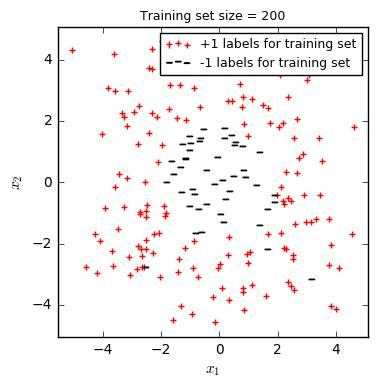

In [39]:
# Load and plot the SVM data
#load the training and test sets
data_train,data_test = np.loadtxt("svm-train.txt"),np.loadtxt("svm-test.txt")
x_train, y_train = data_train[:,0:2], data_train[:,2].reshape(-1,1)
x_test, y_test = data_test[:,0:2], data_test[:,2].reshape(-1,1)

#determine predictions for the training set
yplus = np.ma.masked_where(y_train[:,0]<=0, y_train[:,0])
xplus = x_train[~np.array(yplus.mask)]
yminus = np.ma.masked_where(y_train[:,0]>0, y_train[:,0])
xminus = x_train[~np.array(yminus.mask)]

#plot the predictions for the training set
figsize = plt.figaspect(1)
f, (ax) = plt.subplots(1, 1, figsize=figsize) 

pluses = ax.scatter (xplus[:,0], xplus[:,1], marker='+', c='r', label = '+1 labels for training set')
minuses = ax.scatter (xminus[:,0], xminus[:,1], marker=r'$-$', c='b', label = '-1 labels for training set')

ax.set_ylabel(r"$x_2$", fontsize=11)
ax.set_xlabel(r"$x_1$", fontsize=11)
ax.set_title('Training set size = %s'% len(data_train), fontsize=9)  
ax.axis('tight')
ax.legend(handles=[pluses, minuses], fontsize=9)
plt.show()

> The data is clearly not linearly separable. Using an RBF kernel may give us a separating boundary.

2.Unlike for kernel ridge regression, there is no closed-form solution
for SVM classification (kernelized or not). Implement kernelized Pegasos.
Because we are not using a sparse representation for this data, you
will probably not see much gain by implementing the ''optimized''
versions described in the problems above.

In [102]:
def kernelized_pegasos_algo(X, y, K, kernel_type, Lambda, max_epochs=10):
    t0 = time.time()
    epoch = 0
    total_steps = 1
    n = X.shape[0]
    alpha = np.zeros(n)

    while (epoch<max_epochs):
        for j in range(n):
            eta = 1/(total_steps  * Lambda)
            alpha = (1 - eta*Lambda) * alpha
            
            if y[j] * (np.dot(np.transpose(K[j]), alpha)) < 0:
                alpha[j] = alpha[j] + (eta * y[j])
            else:
                alpha[j] = alpha[j]
                
            total_steps += 1
            
        epoch = epoch + 1
        
        km = Kernel_Machine(kernel_type, X, alpha)
        preds = km.predict(X)
        
#         correct = 0
#         for j in range(n):
#             if (y[j] * np.dot(np.transpose(K[j]), alpha) > 0):
#                 correct += 1
#         print("accuracy after this epoch:", correct/n)
            
    
    print("total_steps", total_steps)
    print("epochs", epoch)
    t1 = time.time()
    avg_time = (t1-t0) / max_epochs
    return alpha, avg_time

In [103]:
K = RBF_kernel(x_train,x_train,sigma=0.1)
alpha, avg_time = kernelized_pegasos_algo(x_train, y_train, K, RBF_kernel, Lambda=0.0625)

total_steps 2001
epochs 10


3.Find the best hyperparameter settings (including kernel parameters
and the regularization parameter) for each of the kernel types. Summarize
your results in a table, which gives training error and test error
(i.e. average $0/1$ loss) for each setting. Include in your table
the best settings for each kernel type, as well as nearby settings
that show that making small change in any one of the hyperparameters
in either direction will cause the performance to get worse. You should
use the $0/1$ loss on the test set to rank the parameter settings. 

4.Plot your best fitting prediction functions using the linear, polynomial,
and the RBF kernel. The code provided may help.